In [88]:
%%writefile /mnt/solexa/mel_yang/bronzeage/jda/jda_getpd_dfreq_downsample.py
##Make frequency and read file, oriented by ancestry (allele in chimp)

import collections
import numpy as np
import sys
import random
#moderneas="Japanese"
moderneas=sys.argv[1]

pD1="/mnt/solexa/mel_yang/bronzeage/data/"
pD2="/mnt/solexa/mel_yang/bronzeage/jda_dfb/"
fh="ind_A_v13_TBH"
indfilename="ind_A_v13_TBH_manualpdeasmerge"
indfile=open(pD1+indfilename+".ind",'r')
pdeasall=[]
for ind,line in enumerate(indfile):
    x = line.split()
    if x[2] == moderneas: pdeasall.append(ind)
    if x[2] == "Chimp": ancind=ind ##ONLY 0/2, no heterozygotes
indfile.close()

print len(pdeasall)
for howmany in [30]: #[5,10,15,20,25,30]:
    pdeas=sorted(random.sample(pdeasall,howmany))

    newfile=open(pD2+indfilename+".pdEAS_dfb1."+moderneas+".ss"+str(howmany)+".dfreq",'w')
    #newfile.write(moderneas+".ss"+str(howmany)+'\n')
    newfile.write('kref\tnref\n')
    genofile=open(pD1+fh+".geno",'r')
    num=0
    for line in genofile:
        num+=1
        #if num==10: break
        ancgeno=int(line[ancind])

        easgeno=[int(line[ind]) for ind in pdeas]
        if 9 in easgeno: mydfreq=-5
        else: 
            total=2.0*len(easgeno)
            secondallele=np.sum(easgeno)
            if ancgeno==0: mydfreq= secondallele #secondallele/total
            elif ancgeno==2: mydfreq=total-secondallele #1-(secondallele/total)
            else: print "ancgeno is", ancgeno
        dfreqs=mydfreq
        #if indiv=="Han_HGDP": print easgeno, ancgeno, mydfreq,mydfreq*66
        newfile.write("%i\t%i" % (dfreqs,total) + '\n')
        #newfile.write("%.4f" % dfreqs + '\n')

    newfile.close()

  
    

Overwriting /mnt/solexa/mel_yang/bronzeage/jda/jda_getpd_dfreq_downsample.py


In [53]:
#%%writefile /mnt/solexa/mel_yang/bronzeage/jda/jda_getpd_dfreq_downsample.py
##Make frequency and read file, oriented by ancestry (allele in chimp)
##Downsample, randomly choose individual at each SNP, rather than at beginning for all SNPs
import collections
import numpy as np
import sys
import random
moderneas="Han_HGDP"
#moderneas=[sys.argv[1]]

pD1="/home/mel_yang/projects/bronzeage/"
pD2="/mnt/solexa/mel_yang/bronzeage/jda_dfb/"
indfilename="ind_A_v13_TBH4"
indfile=open(pD1+indfilename+".ind",'r')
pdeasall=[]
for ind,line in enumerate(indfile):
    x = line.split()
    if x[2] == moderneas: pdeasall.append(ind)
    if x[2] == "Chimp": ancind=ind ##ONLY 0/2, no heterozygotes
indfile.close()
print len(pdeasall)
for howmany in [5,10,15,20,25,30]:
    #pdeas=sorted(random.sample(pdeasall,howmany))

    newfile=open(pD2+indfilename+".pdEAS_dfb2."+moderneas+".ss"+str(howmany)+".dfreq",'w')
    #newfile.write(moderneas+".ss"+str(howmany)+'\n')
    newfile.write('kref\tnref\n')
    genofile=open(pD1+indfilename+".geno",'r')
    num=0
    for line in genofile:
        num+=1
        #if num==10: break
        ancgeno=int(line[ancind])

        easgeno=[int(line[ind]) for ind in pdeasall]
        easgeno=[i for i in easgeno if i!=9]
        if len(easgeno) < howmany: dfreqs=-5
        else: 
            easgeno=random.sample(easgeno,howmany)
            total=2.0*len(easgeno)
            secondallele=np.sum(easgeno)
            if ancgeno==0: mydfreq= secondallele #secondallele/total
            elif ancgeno==2: mydfreq=total-secondallele #1-(secondallele/total)
            else: print "ancgeno is", ancgeno
            dfreqs=mydfreq
        #if indiv=="Han_HGDP": print easgeno, ancgeno, mydfreq,mydfreq*66
        newfile.write("%i\t%i" % (dfreqs,total) + '\n')
        #newfile.write("%.4f" % dfreqs + '\n')

    newfile.close()

  
    

33


In [54]:
%%bash
pD="/mnt/solexa/mel_yang/bronzeage/jda/"
pD2="/mnt/solexa/mel_yang/bronzeage/jda_dfb/"
addon="_switchanc"
ref="Han_HGDP"
for ss in 5 10 15 20 25 30; 
do
    paste ${pD}jda_anceas${addon}.chrompos ${pD2}ind_A_v13_TBH.pdEAS_dfb2.${ref}.ss${ss}.dfreq ${pD}jda_anceas${addon}.readcount > ${pD2}jda_dfb2_anceas${addon}_${ref}.ss${ss}.comb
    #_nomissfixed.comb
done

In [90]:
%%bash
pD="/mnt/solexa/mel_yang/bronzeage/jda/"
pD2="/mnt/solexa/mel_yang/bronzeage/jda_dfb/"
addon="_switchanc"
ref="Han_HGDP"
ss=30
for ref in French Japanese Han_NChina Han_SChina Kazakh TibetanSW She_Miao_Tujia Thai_Dai Spanish Yoruba; 
do
    paste ${pD}jda_anceas${addon}.chrompos ${pD2}ind_A_v13_TBH_manualpdeasmerge.pdEAS_dfb1.${ref}.ss${ss}.dfreq ${pD}jda_anceas${addon}.readcount > ${pD2}jda_dfb1_anceas${addon}_${ref}.ss${ss}.comb
    #_nomissfixed.comb
done

In [12]:
pD2="/mnt/solexa/mel_yang/bronzeage/jda_dfb/"
orderednames=['L0554','R2039','R2142','L0597','R2096','R2148',
              'R2038','R2099','TY','M11','M12','M819','M820',
              'M827','M9JM6-1','L0729','D1965','D1968','D5602',
              'D5604','D5605','D5607','D5608']
mypops=["Tonglin","Linzi","XianShang","Yaojia","Zhougongmiao",
       "XianShang","Linzi","Linzi","Tianyuan","Donghuigou",
       "Donghuigou","Donghuigou","Donghuigou","Donghuigou",
        "Donghuigou","Balikun","Xiaoshuangqiao","Xiaoshuangqiao",
        "Xiaoshuangqiao","Guandimiao","Guandimiao",
       "Guandimiao_contaminated","Guandimiao"]
newindfile=open(pD2+"ancindivs.ind",'w')
for ind,i in enumerate(orderednames):
    newindfile.write("%s\tU\t%s\n" % (i,mypops[ind]) )
newindfile.close()

In [92]:
##Remove missing or fixed data
##Remove 

pD2="/mnt/solexa/mel_yang/bronzeage/jda_dfb/"
addon="_switchanc"
subset1="dfb1_"
subset2=subset1+"df2.5co_"
subset2=subset1+"manualmerge_beta1_"
ref="Han_HGDP"
ss=30
#for ss in [5,10,15,20,25,30]:
for ref in ["Japanese","French","Han_NChina","Han_SChina","Kazakh",
            "TibetanSW","She_Miao_Tujia","Thai_Dai","Spanish","Yoruba"]:
    combfile=open(pD2+"jda_"+subset1+"anceas"+addon+"_"+ref+".ss"+str(ss)+".comb",'r')
    newcombfile=open(pD2+"jda_"+subset2+"anceas"+addon+"_"+ref+".ss"+str(ss)+"_nomissfixed.comb",'w')
    for line in combfile:
        x=line.split()
        if x[0] == "Chrom": newcombfile.write(line); continue
        if x[2] == '0' or x[2] == x[3] or x[2] == "-5": continue
        #myfreq=float(x[2])/float(x[3])
        #print myfreq
        #if myfreq<0.05 or myfreq>0.95: continue
        #if myfreq<0.025 or myfreq>0.975: continue
        newcombfile.write(line)
    combfile.close()
    newcombfile.close()

In [56]:
%%writefile /home/mel_yang/projects/bronzeage/continuity/run_mel_job_all_Han_HGDPss_dfb2.py
from ancient_genotypes import *
from numpy import *
import pandas
import cPickle
pD="/mnt/solexa/mel_yang/bronzeage/jda_dfb/"
addon="_switchanc"
refpop="Han_HGDP"
myss=[5,10,15,20,25,30]

indfile=pD+"ancindivs.ind"
for ss in myss:
    myref=refpop+".ss"+str(ss)
    readfile=pD+"jda_dfb2_anceas"+addon+"_"+myref+"_nomissfixed.comb"
    unique_pops, inds, label, pops, freqs, read_lists = parse_reads_by_pop(readfile,indfile,cutoff=0)
    #freq, reads, inds = parse_reads(pD+"jda_anceas"+addon+"_"+myref+"_nomissfixed.comb",cutoff=0)
    ##Tonglin, Linzi, XianShang, Yaojia/ZGM, TY, DHG, BLK
    #pops=[[0],[1,6,7],[2,5],[3],[4],[8],[9,10,11,12,13],[14]]
    params_pops = optimize_pop_params_error_parallel(freqs,read_lists,detail=False,num_core=6,continuity=False)
    cPickle.dump(params_pops,open(pD+"dfb2_ind_A_v13_TBH"+addon+"."+myref+"_contFalse.pickle","w"))
    params_pops = optimize_pop_params_error_parallel(freqs,read_lists,detail=False,num_core=6,continuity=True)
    cPickle.dump(params_pops,open(pD+"dfb2_ind_A_v13_TBH"+addon+"."+myref+"_contTrue.pickle","w"))

Writing /home/mel_yang/projects/bronzeage/continuity/run_mel_job_all_Han_HGDPss_dfb2.py


In [93]:
%%writefile /home/mel_yang/projects/bronzeage/continuity/run_mel_job_all_Han_HGDPss_dfb1_testbeta1.py
from ancient_genotypes import *
from numpy import *
import pandas
import cPickle
pD="/mnt/solexa/mel_yang/bronzeage/jda_dfb/"
addon="_switchanc"
refpop="Han_HGDP"
myss=[5,10,15,20,25,30]
subset1="dfb1_df5co"
subset1="dfb1_manualmerge_beta1"
subset2=subset1+"_beta1"
subset2=subset1
indfile=pD+"ancindivs.ind"
ss=30
newfile=open(pD+subset2+"alphabetadiffrefpops.txt",'w')
#for ss in [30]:
for refpop in ["Japanese","French","Han_NChina","Han_SChina","Kazakh",
            "TibetanSW","She_Miao_Tujia","Thai_Dai","Spanish","Yoruba"]:
    myref=refpop+".ss"+str(ss)
    readfile=pD+"jda_"+subset1+"_anceas"+addon+"_"+myref+"_nomissfixed.comb"
    
    unique_pops, inds, label, pops, freqs, read_lists = parse_reads_by_pop(readfile,indfile,cutoff=0)
    alpha, beta = get_beta_params(freqs,read_lists)
    newfile.write("%s\t%.4f\t%.4f\n" % (refpop,alpha,beta))
newfile.close()
#for ss in myss:
#    myref=refpop+".ss"+str(ss)
#    readfile=pD+"jda_"+subset1+"_anceas"+addon+"_"+myref+"_nomissfixed.comb"
#    
#    unique_pops, inds, label, pops, freqs, read_lists = parse_reads_by_pop(readfile,indfile,cutoff=0)
#
#    params_pops = optimize_pop_params_error_parallel(freqs,read_lists,num_core=10,detail=0,alpha=alpha,beta=beta,continuity=False)
#    cPickle.dump(params_pops,open(pD+subset2+"_ind_A_v13_TBH"+addon+"."+myref+"_contFalse.pickle","w"))
#    params_pops = optimize_pop_params_error_parallel(freqs,read_lists,num_core=10,detail=0,alpha=alpha,beta=beta,continuity=True)
#    cPickle.dump(params_pops,open(pD+subset2+"_ind_A_v13_TBH"+addon+"."+myref+"_contTrue.pickle","w"))

    
    #params_pops = optimize_pop_params_error_parallel(freqs,read_lists,detail=False,num_core=6,continuity=False)
    #cPickle.dump(params_pops,open(pD+subset1+subset2+"_ind_A_v13_TBH"+addon+"."+myref+"_contFalse.pickle","w"))
    #params_pops = optimize_pop_params_error_parallel(freqs,read_lists,detail=False,num_core=6,continuity=True)
    #cPickle.dump(params_pops,open(pD+subset1+subset2+"_ind_A_v13_TBH"+addon+"."+myref+"_contTrue.pickle","w"))

Overwriting /home/mel_yang/projects/bronzeage/continuity/run_mel_job_all_Han_HGDPss_dfb1_testbeta1.py


In [74]:
%%writefile /home/mel_yang/projects/bronzeage/continuity/run_mel_job_all_Han_HGDPss_dfb1_testbeta2.py
from ancient_genotypes import *
from numpy import *
import pandas
import cPickle
pD="/mnt/solexa/mel_yang/bronzeage/jda_dfb/"
addon="_switchanc"
refpop="Han_HGDP"
myss=[5,10,15,20,25,30]
subset1="dfb1"
subset2="_beta2"
indfile=pD+"ancindivs.ind"
newfile=open(pD+subset1+subset2+"alphabeta.txt",'w')
for ss in myss:
    if ss==5: continue
    myref=refpop+".ss"+str(ss)
    readfile=pD+"jda_"+subset1+"_anceas"+addon+"_"+myref+"_nomissfixed.comb"
    
    unique_pops, inds, label, pops, freqs, read_lists = parse_reads_by_pop(readfile,indfile,cutoff=0)
    alpha, beta = get_beta_params(freqs,read_lists)
    newfile.write(str(alpha) + '\t' + str(beta) + '\n')
    params_pops = optimize_pop_params_error_parallel(freqs,read_lists,num_core=1,detail=0,alpha=alpha,beta=beta,continuity=False)
    cPickle.dump(params_pops,open(pD+subset1+subset2+"_ind_A_v13_TBH"+addon+"."+myref+"_contFalse.pickle","w"))
    params_pops = optimize_pop_params_error_parallel(freqs,read_lists,num_core=1,detail=0,alpha=alpha,beta=beta,continuity=True)
    cPickle.dump(params_pops,open(pD+subset1+subset2+"_ind_A_v13_TBH"+addon+"."+myref+"_contTrue.pickle","w"))
newfile.close()

Overwriting /home/mel_yang/projects/bronzeage/continuity/run_mel_job_all_Han_HGDPss_dfb1_testbeta2.py


In [15]:
%%writefile /home/mel_yang/projects/bronzeage/continuity/run_mel_job_all_Han_HGDPss.py
from ancient_genotypes import *
from numpy import *
import pandas
import cPickle
pD="/mnt/solexa/mel_yang/bronzeage/jda/"
addon="_switchanc"
refpop="Han_HGDP"
myss=[5,10,15,20,25,30]
for ss in myss:
    myref=refpop+".ss"+str(ss)
    freq, reads, inds = parse_reads(pD+"jda_anceas"+addon+"_"+myref+"_nomissfixed.comb",cutoff=0)
    ##Tonglin, Linzi, XianShang, Yaojia/ZGM, TY, DHG, BLK
    pops=[[0],[1,6,7],[2,5],[3],[4],[8],[9,10,11,12,13],[14]]
    params_pops = optimize_pop_params_error_parallel(freq,reads,pops,detail=False,num_core=8,continuity=False)
    cPickle.dump(params_pops,open(pD+"ind_A_v13_TBH"+addon+"."+myref+"_contFalse.pickle","w"))
    params_pops = optimize_pop_params_error_parallel(freq,reads,pops,detail=False,num_core=8,continuity=True)
    cPickle.dump(params_pops,open(pD+"ind_A_v13_TBH"+addon+"."+myref+"_contTrue.pickle","w"))

Writing /home/mel_yang/projects/bronzeage/continuity/run_mel_job_all_Han_HGDPss.py


6
_______________________
Han_HGDP.ss5
11
False Tonglin 22823.7200029 [0.086908360325056611, 1.3182589690541691, 0.061693879707869867]
True Tonglin 22902.4300069 [0.091591339484925913, 0.033313227766932144]
_______________________
Han_HGDP.ss10
11
False Tonglin 24401.1005647 [0.057280612649088264, 9.6649528825589268, 0.071063117032903425]
True Tonglin 24487.0403115 [0.068427609320739061, 0.038856956666002654]
_______________________
Han_HGDP.ss15
11
False Tonglin 25000.6031109 [0.052200641052893383, 1.2709909699109405, 0.058257505470174838]
True Tonglin 25105.2547631 [0.061620275376417885, 0.040945731632956485]
_______________________
Han_HGDP.ss20
11
False Tonglin 25191.5309495 [0.040254515149234629, 9.4940202658749335, 0.068427853691894192]
True Tonglin 25282.9856332 [0.05390724086223668, 0.041300530441882068]
_______________________
Han_HGDP.ss25
11
False Tonglin 25367.560987 [0.035910946299315169, 9.4484191991322799, 0.067886935205869248]
True Tonglin 25458.4101195 [0.0498097302696

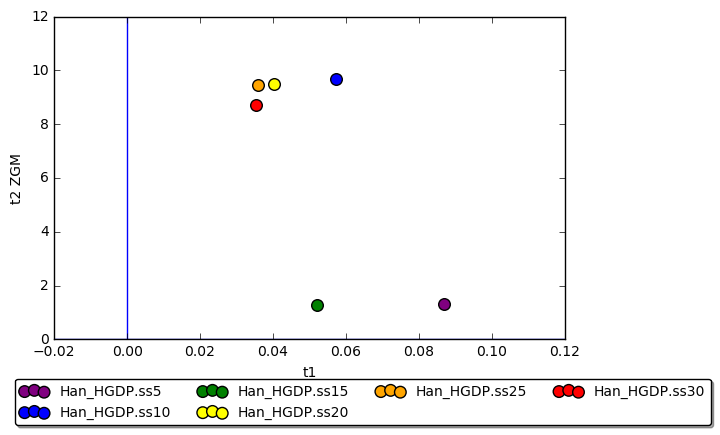

In [23]:
%matplotlib inline

import cPickle
import matplotlib.pyplot as plt
pD="/mnt/solexa/mel_yang/bronzeage/jda_dfb/"
addon="_switchanc"
refpops=["Han_HGDP.ss5","Han_HGDP.ss10","Han_HGDP.ss15","Han_HGDP.ss20",
         "Han_HGDP.ss25","Han_HGDP.ss30"] #,"Han_HGDP"]
print len(refpops)
#refpops=["Han_HGDP"]
mypops=["Tonglin", "Linzi", "XianShang", "Yaojia","ZGM", "TY","DHG","BLK"]
popiwant="TY"
#fig = plt.figure(figsize=(17,10))
fig = plt.figure()
for myind,popiwant in enumerate(mypops):
    if myind!=4: continue
    #ax = fig.add_subplot(4,2,myind+1)
    ax = fig.add_subplot(1,1,1)
    t1f,t2f,t1t,t2t=[],[],[],[]
    for refpop in refpops:
        print "_______________________"
        print refpop
        falsefile=open(pD+"dfb_ind_A_v13_TBH"+addon+"."+refpop+"_contFalse.pickle",'r')
        falsedat=cPickle.load(falsefile)
        truefile=open(pD+"dfb_ind_A_v13_TBH"+addon+"."+refpop+"_contTrue.pickle",'r')
        truedat=cPickle.load(truefile)
        #print falsedat
        print len(truedat)
        for ind,mypop in enumerate(falsedat):
            #if ind in [0,2,3,4]: continue
            #if ind in [0,1,2,3]: continue
            ##if mypops[ind] == popiwant:
            if ind == 0:
                print "False", mypops[ind],mypop[1], list(mypop[0])
                print "True", mypops[ind],truedat[ind][1],list(truedat[ind][0])
                t1f.append(mypop[0][0])
                t2f.append(mypop[0][1])
                t1t.append(truedat[ind][0][0])
                t2t.append(truedat[ind][0][1])


    colors=["purple","blue","green","yellow","orange","red","brown",
            "gray","black","lavender","fuchsia","goldenrod","peachpuff","cyan",
            "lawngreen","mediumslateblue","cadetblue","pink","tan","lavenderblush",
            "sage","peru","gainsboro"]
    #print t1f
    for i in range(len(t1f)):
        #handles.append(ax.scatter(t1f[i],t2f[i],c=colors[i],label=refpops[i]))
        ax.scatter(t1f[i],t2f[i],label=refpops[i],c=colors[i],s=70)
    
    #ax.set_xlim((0,0.13))
    #ax.set_ylim((0,0.35))
    ax.set_xlabel("t1")
    ax.set_ylabel("t2 "+popiwant)
    ax.axhline(y=0)
    ax.axvline(x=0)
ax.legend(fontsize=10,bbox_to_anchor=(1.3, -0.1),ncol=4, fancybox=True, shadow=True)
fig.tight_layout()

False Zhougongmiao 305288.006461 [1e-10, 0.016536955213657074, 0.0060454993517945858]
True Zhougongmiao 305301.5642 [1e-10, 0.0059216382361597045]


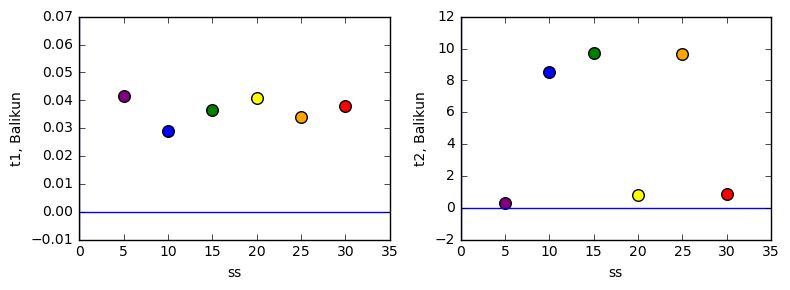

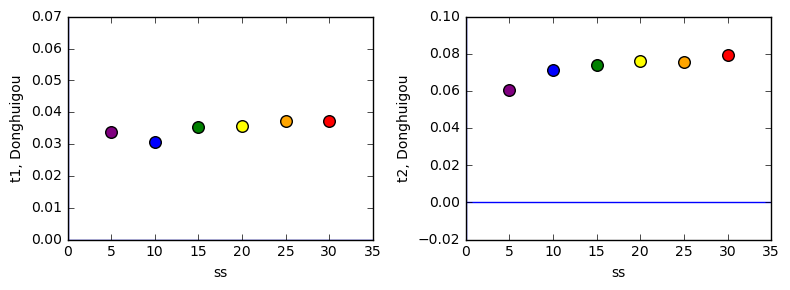

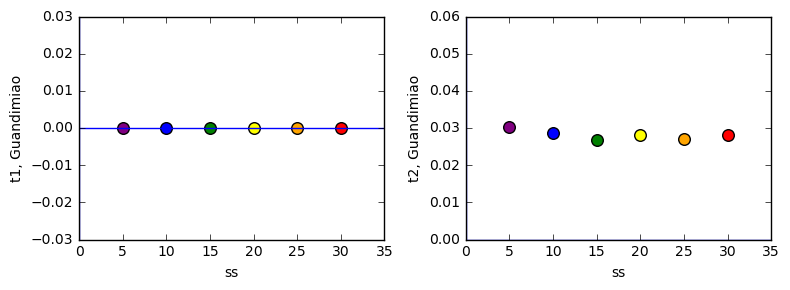

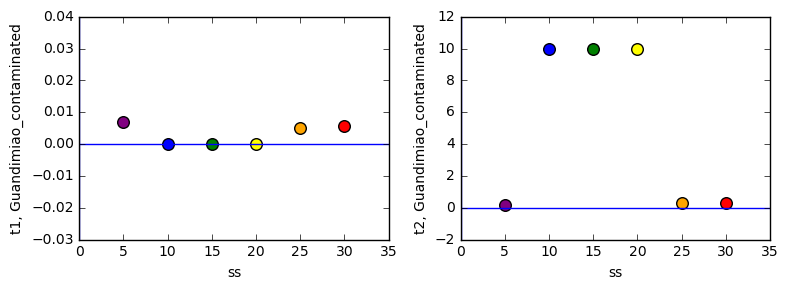

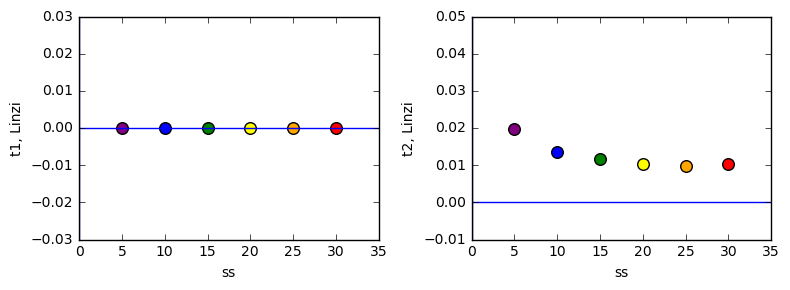

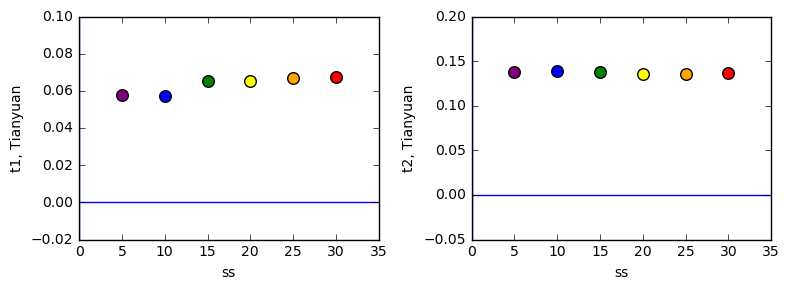

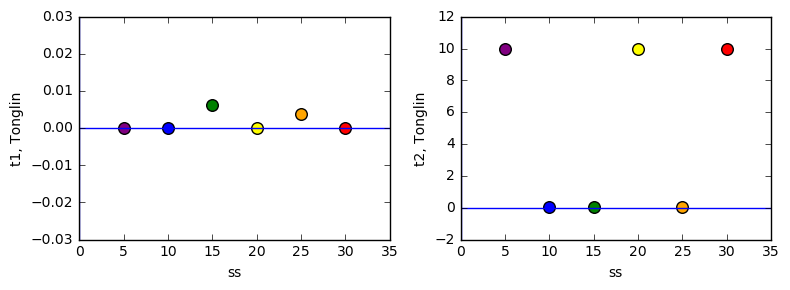

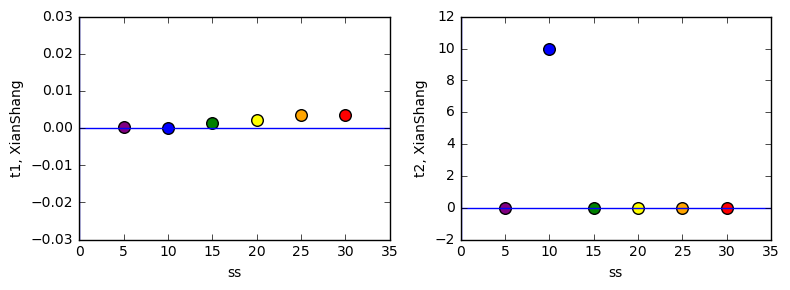

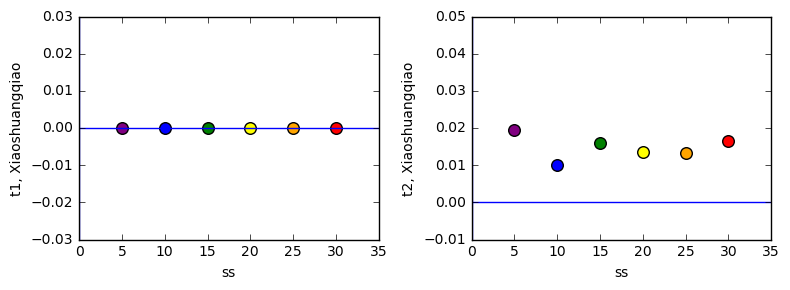

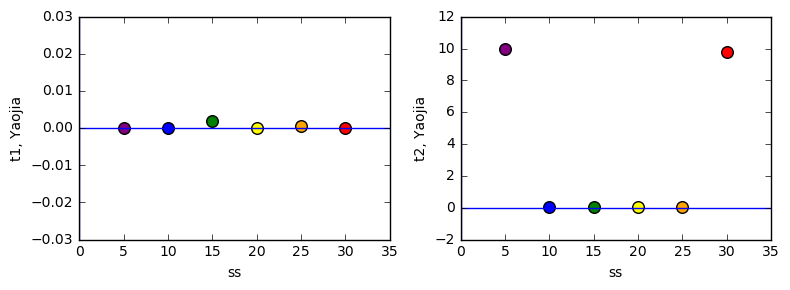

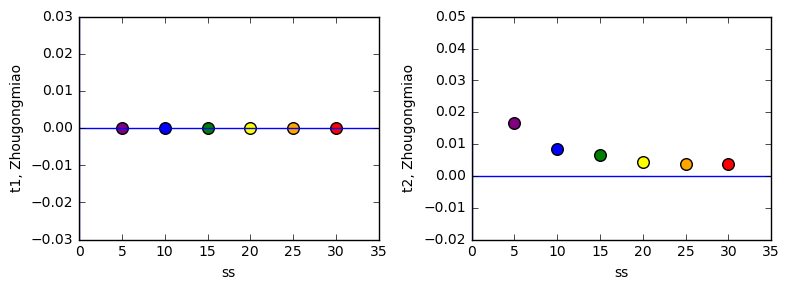

In [102]:
%matplotlib inline

import cPickle
import matplotlib.pyplot as plt
pD="/mnt/solexa/mel_yang/bronzeage/jda_dfb/"
addon="_switchanc"
subset="dfb1_beta1_"
subset="dfb1_df5co_beta1_"
#refpops=["Han_HGDP","Japanese","Ulchi","Zhuang","Dong","Qiang_Horpa","Tibetan_Gangcha",
#        "Thai","Maonan","Mulam","Tibetan_Chamdo","She","Dai","Yi","Tujia","Miao"]
refpops=["Han_HGDP.ss5","Han_HGDP.ss10","Han_HGDP.ss15","Han_HGDP.ss20",
         "Han_HGDP.ss25","Han_HGDP.ss30"] #,"Han_HGDP"] ##"Han_HGDP.ss5",
#myss=[33, 29, 25, 22, 20, 20, 20, 19, 17, 17, 12, 10, 10, 10, 10, 10]
myss=[5,10,15,20,25,30,33] #5,
#mypops=["Tonglin", "Linzi", "XianShang", "Yaojia","ZGM", "TY","DHG","BLK"]
#popiwant="TY"
mypops=[]
indfile=open(pD+"ancindivs.ind",'r')
for line in indfile: 
    x=line.split()
    if x[2] in mypops: continue
    else: mypops.append(x[2])

mypops=sorted(mypops)

#fig = plt.figure()
for myind,popiwant in enumerate(mypops):
    fig = plt.figure(figsize=(8,3))
    #if myind!=4: continue
    #ax = fig.add_subplot(4,2,myind+1)
    
    t1f,t2f,t1t,t2t=[],[],[],[]
    for refpop in refpops:
        #print "_______________________"
        #print refpop
        falsefile=open(pD+subset+"ind_A_v13_TBH"+addon+"."+refpop+"_contFalse.pickle",'r')
        falsedat=cPickle.load(falsefile)
        truefile=open(pD+subset+"ind_A_v13_TBH"+addon+"."+refpop+"_contTrue.pickle",'r')
        truedat=cPickle.load(truefile)
        #print falsedat[0][0]

        for ind,mypop in enumerate(falsedat):
            #print mypop
            #if ind in [0,2,3,4]: continue
            #if ind in [0,1,2,3]: continue
            if mypops[ind] == popiwant:
                if popiwant=="Zhougongmiao" and refpop=="Han_HGDP.ss5":
                    print "False", mypops[ind],mypop[1], list(mypop[0])
                    print "True", mypops[ind],truedat[ind][1],list(truedat[ind][0])
                t1f.append(mypop[0][0])
                t2f.append(mypop[0][1])
                t1t.append(truedat[ind][0][0])
                t2t.append(truedat[ind][0][1])


    colors=["purple","blue","green","yellow","orange","red","brown",
            "gray","black","lavender","fuchsia","goldenrod","peachpuff","cyan",
            "lawngreen","mediumslateblue","cadetblue","pink","tan","lavenderblush",
            "sage","peru","gainsboro"]
    #print t1f
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    for i in range(len(t1f)):
        #handles.append(ax.scatter(t1f[i],t2f[i],c=colors[i],label=refpops[i]))
        #ax.scatter(t1f[i],t2f[i],label=refpops[i],c=colors[i],s=70)
        ax1.scatter(myss[i],t1f[i],label=refpops[i],c=colors[i],s=70) #/t2f[i]
        ax2.scatter(myss[i],t2f[i],label=refpops[i],c=colors[i],s=70) #/t2f[i]
    #print t1f
    #ax.set_xlim((0,0.13))
    #ax.set_ylim((0,0.35))
    ax1.set_xlabel("ss")
    ax1.set_ylabel("t1, "+popiwant)
    ax1.axhline(y=0)
    ax1.axvline(x=0)
    ax2.set_xlabel("ss")
    ax2.set_ylabel("t2, "+popiwant)
    ax2.axhline(y=0)
    ax2.axvline(x=0)
    fig.tight_layout()
#ax.legend(fontsize=10,bbox_to_anchor=(1.1, -0.1),ncol=4, fancybox=True, shadow=True)


In [37]:
falsefile=open(pD+"dfb_ind_A_v13_TBH"+addon+"."+refpop+"_contFalse.pickle",'r')
falsedat=cPickle.load(falsefile)
print len(falsedat)



11


In [ ]:
False Zhougongmiao 523646.34879 [0.0096042502591904104, 0.00049267449430023108, 0.0089989540789301662, 0.016607875066723239, 0.0085094593332150619]
True Zhougongmiao 523646.404288 [0.0097633460839480803, 0.0089872715439000966, 0.016563269467803225, 0.0085014817635390341]

False Zhougongmiao 552963.16715 [0.0096960997523576169, 0.0003998186715441196, 0.0090712054736462339, 0.016332835545118024, 0.0085620301406886066]
True Zhougongmiao 552963.206228 [0.0098184386134607705, 0.0090611425470862126, 0.016299802014087473, 0.0085552978241993215]